# EDA 과제 
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/YBIGTA/교육세션 5일차/airbnb_listings.csv', index_col=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [4]:
# Q1
# data의 shape 확인
print(df.shape)
# display.max_columns로 누락되는 column 정보까지 표시하기
pd.set_option('display.max_columns', None)
display(df.head())

(50796, 54)


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [5]:
# Q2
# df의 변수 타입 및 null값, 개수 등에 대한 정보 출력
display(df.info())
# 각 컬럼 별 결측치 확인
print(f'finding out nullvalues')
nullvalues = df.isnull().sum()
display(nullvalues)
# isnull().sum()으로 만들어진 nullvalues의 type 확인 : pandas series
print(f'types of variable "nullvalues" : {type(nullvalues)}')
# null값이 없는 칼럼 제거 (필터링)
nonzeronull = nullvalues[nullvalues > 0]
# Series -> DataFrame
df2 = pd.DataFrame(nonzeronull, columns=['nonzeronull'])
# 결측치가 많은 순서대로 정렬하기
df2 = df2.sort_values(by="nonzeronull", ascending=False)
# 결측치 비율을 계산한 column 만들기
df2['missing_%'] = round(df2['nonzeronull']/len(df) * 100, 1) # 소수 첫째 자리에서 반올림
# print(df2.shape) # (25,2)
df2 = df2.transpose() # (25,2) -> (2, 25)
# display로 나타내기
display(df2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50796 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  long

None

finding out nullvalues


id                                      0
host_response_time                  19006
host_response_rate                  19006
host_acceptance_rate                14015
host_is_superhost                       5
host_listings_count                     5
host_total_listings_count               5
host_verifications                      0
host_has_profile_pic                    5
host_identity_verified                  5
neighborhood                            0
latitude                                0
longitude                               0
is_location_exact                       0
property_type                           0
room_type                               0
accommodates                            0
bathrooms                              54
bedrooms                               77
beds                                  482
bed_type                                0
amenities                               0
square_feet                         50407
price                             

types of variable "nullvalues" : <class 'pandas.core.series.Series'>


,jurisdiction_names,license,square_feet,monthly_price,weekly_price,host_response_rate,host_response_time,security_deposit,host_acceptance_rate,review_scores_value,review_scores_location,review_scores_checkin,review_scores_accuracy,review_scores_communication,review_scores_cleanliness,review_scores_rating,reviews_per_month,beds,bedrooms,bathrooms,host_listings_count,host_total_listings_count,host_has_profile_pic,host_is_superhost,host_identity_verified
nonzeronull,50781.0,50759.0,50407.0,46119.0,45411.0,19006.0,19006.0,17325.0,14015.0,11482.0,11482.0,11479.0,11466.0,11463.0,11452.0,11431.0,10453.0,482.0,77.0,54.0,5.0,5.0,5.0,5.0,5.0
missing_%,100.0,99.9,99.2,90.8,89.4,37.4,37.4,34.1,27.6,22.6,22.6,22.6,22.6,22.6,22.5,22.5,20.6,0.9,0.2,0.1,0.0,0.0,0.0,0.0,0.0


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

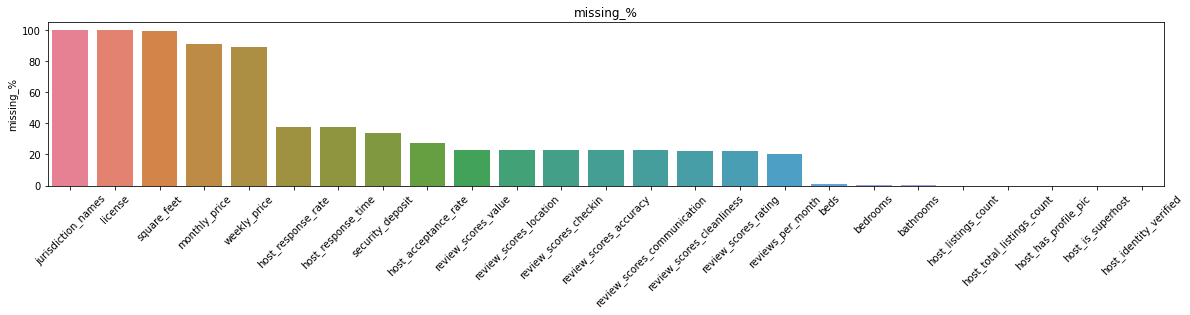

In [6]:
# Q3
# 결측치와 관련된 df2를 'null_percentage' column에 따라 색상을 다르게 하여 histogram 형태로 나타내보자는 생각
# 사용 가능한 그래프의 종류 : barplot + 색상 정보에 대한 부분???
# https://seaborn.pydata.org/tutorial/color_palettes.html

import warnings
warnings.filterwarnings('ignore')

# plot의 사이즈 키우기 (기본 실행 시 작아서 x_label의 확인이 어려움)
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib
plt.rcParams["figure.figsize"] = (20,3)

# 앞서 정의한 결측치에 대한 df2
x_val = df2.columns.values.tolist()
y_val = df2.iloc[1,:]

# color palette 관련 참고
# diverging_color palette
# https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
# diverging_colors = reversed(sns.diverging_palette(330, 15, n=df2.shape[1]))
# diverging_colors = sns.color_palette("Spectral", n_colors=df2.shape[1], desat=0.8)
diverging_colors = sns.color_palette("husl", df2.shape[1])

sns.barplot(x= x_val, y=y_val, palette=diverging_colors)

plt.title('missing_%')
# xticks rotation
# https://stackoverflow.com/questions/31859285/rotate-tick-labels-for-seaborn-barplot
plt.xticks(rotation=45)
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다. 
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [7]:
# Q4
# df의 beds column이 NaN인 부분
display(df[df['beds'].isnull() == True].head())

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [8]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [9]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다. 
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

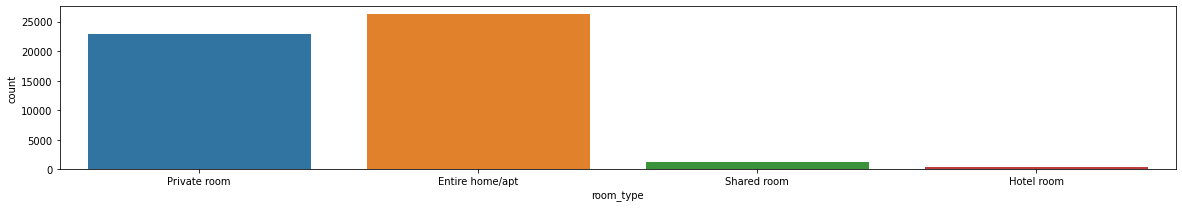

In [11]:
# Q5
sns.countplot(x = 'room_type', data = df)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

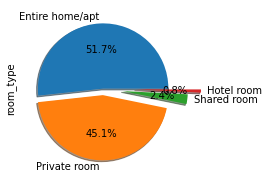

In [12]:
# 번외 pie chart
display(df['room_type'].value_counts().plot.pie(explode=[0,0.1, 0.3, 0.5], autopct='%1.1f%%', shadow=True))

Text(0, 0.5, 'room_type %')

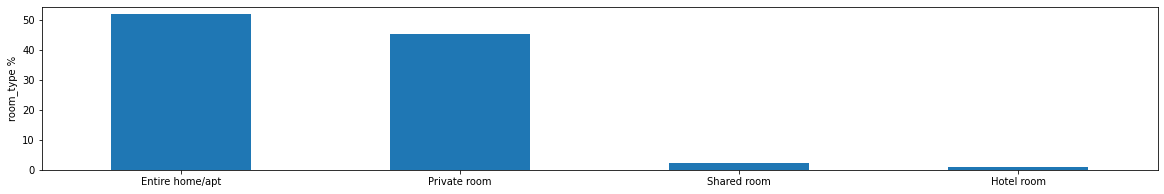

In [13]:
# Q6
# sns.barplot을 활용해야 함.
display((df["room_type"].value_counts() / df["room_type"].value_counts().sum() * 100).plot(kind = "bar"))
plt.xticks(rotation=0)
plt.ylabel("room_type %")

# Text(0, 0.5, 'room_type %') 를 없애려면 어떻게 해야 할까

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

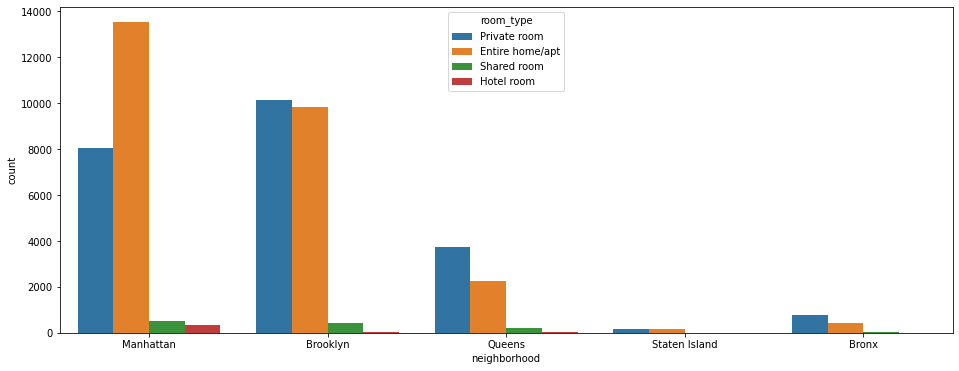

In [14]:
# Q7
# neighborhood 기준 hue로 room_type까지 조회 가능
plt.rcParams["figure.figsize"] = (16,6)
sns.countplot(x = 'neighborhood', hue = 'room_type', data = df)

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

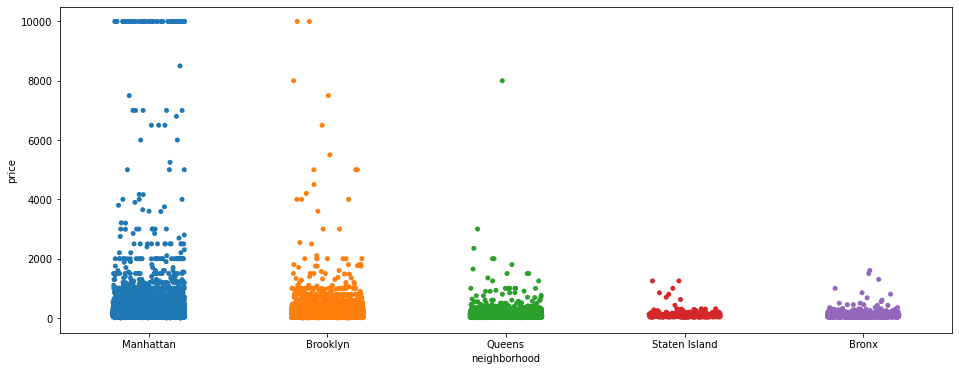

In [15]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.rcParams["figure.figsize"] = (16,6)
sns.stripplot( x = "neighborhood", y = "price", data = df, jitter = 0.2)

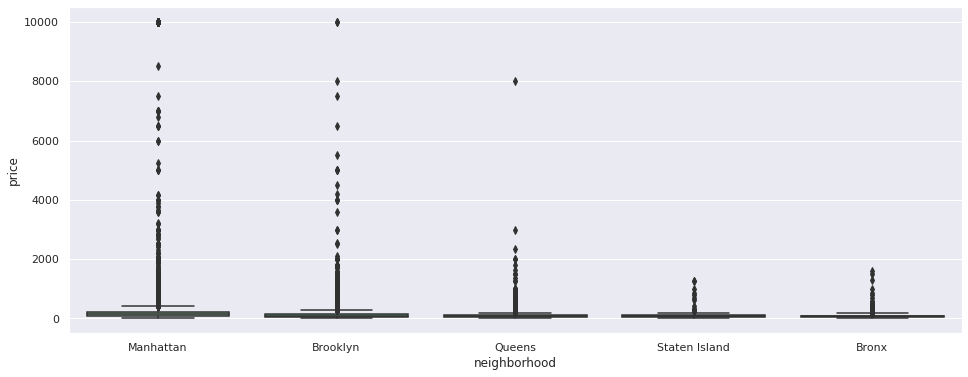

In [16]:
sns.set()
sns.set_palette("crest")
sns.boxplot( x = "neighborhood", y = "price", data = df)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

A9:

총 5만여개의 집이 존재한다.
[방의 종류]
roomtype의 경우는 Private room과 Entire home/apt가 각 51%와 45%의 높은 비중을 차지하고
shared room은 2.4%, 호텔의 비중은 0.8%로 가장 낮다.

[지역별 방의 종류]
맨해튼 - Entire home/apt가 예외적으로 가장 많게 나타났다.

브루클린, 퀸스 네이버후드, 사탄섬, 브롱스에 해당하는 나머지 도시들의 경우 일반적으로 Private room이 Entire home/apt 보다 비슷하거나 좀 더 많았다.


[지역 별 방의 가격]

맨해튼의 경우 높은 가격대에 위치하는 방의 개수가 다른 도시들에 비해 훨씬 많았다.
또한 가격의 분포 자체도 다른 도시들에 비해 넓게 분포하는 특징을 보이는데
아파트와 entire home의 개수와도 관련이 있을 것이라 예상해볼 수도 있다.

box plot을 추가로 그려보았을 때 IQR 값이 Manhattan에서 가장 높다는 점으로 미루어 보아
다양한 가격대의 매물이 존재함을 확인할 수 있다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

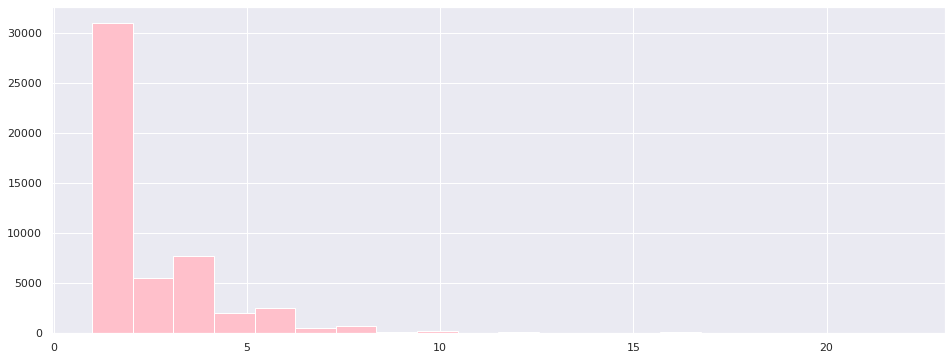

In [17]:
# Q10
plt.hist(x = "accommodates", data = df, bins = 20, color="pink")
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

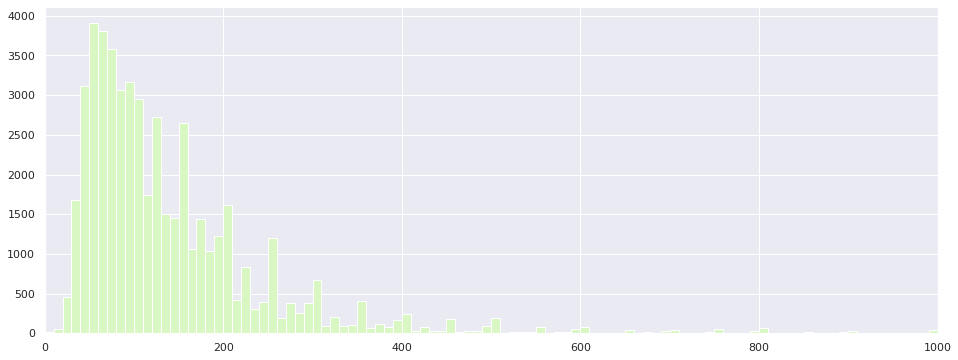

In [18]:
# Q11
plt.hist(x = "price", data = df, bins = 1000, color= (217/256, 248/256, 196/256))
plt.xlim(0, 1000)
plt.show()

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

시각화한 자료를 바탕으로 실제 특성들을 가공하는 방법에 대해서는 

<font color='orange'> 다음 시간인 FE 시간에 배우게 될 예정입니다.

다음 시간에 봐요!

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요. </font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>

